In [1]:
!cat /biipy/version

v1.6.0


## Check numpy

In [2]:
import numpy as np
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
np.__config__.show()

lapack_opt_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    language = c
    library_dirs = ['/usr/lib']
blas_opt_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    language = c
    library_dirs = ['/usr/lib']
blas_mkl_info:
  NOT AVAILABLE
openblas_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    language = c
    library_dirs = ['/usr/lib']
openblas_lapack_info:
    define_macros = [('HAVE_CBLAS', None)]
    libraries = ['openblas']
    language = c
    library_dirs = ['/usr/lib']


## Check matplotlib

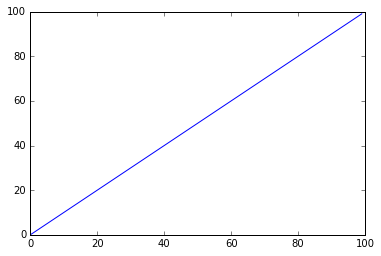

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(a);

## Check numba

In [5]:
def f(x):
    y = np.empty_like(x)
    for i in range(x.size):
        y[i] = x[i] * 2
    return y

In [6]:
x = np.arange(1000000)

In [7]:
%timeit f(x)

1 loops, best of 3: 297 ms per loop


In [8]:
import numba

In [9]:
fjit = numba.jit(f)

In [10]:
%timeit fjit(x)

The slowest run took 57.15 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.43 ms per loop


In [11]:
np.array_equal(f(x), fjit(x))

True

## Check bokeh

In [12]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

BokehJS successfully loaded.

In [13]:
n = 4000
x = np.random.random(size=n) * 100
y = np.random.random(size=n) * 100
radii = np.random.random(size=n) * 1.5
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

In [14]:
p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=.9, line_color=None)

In [15]:
show(p)